In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [10]:
# 2. DNN 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# 3. 학습 루프
for epoch in range(10):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {running_loss / len(train_loader):.4f}")

Epoch 1 - Loss: 0.2302
Epoch 2 - Loss: 0.0946
Epoch 3 - Loss: 0.0658
Epoch 4 - Loss: 0.0496
Epoch 5 - Loss: 0.0388
Epoch 6 - Loss: 0.0334
Epoch 7 - Loss: 0.0276
Epoch 8 - Loss: 0.0258
Epoch 9 - Loss: 0.0218
Epoch 10 - Loss: 0.0195


In [14]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')  # 다중 클래스일 경우 weighted
    cm = confusion_matrix(all_labels, all_preds)

    print("\n=== 최종 평가 결과 ===")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

모델 학습 완료. 테스트 데이터로 성능 평가를 진행합니다.

=== 최종 평가 결과 ===
Accuracy: 98.02%
F1 Score: 0.9802
Confusion Matrix:
[[ 971    0    2    0    2    1    2    0    1    1]
 [   2 1117    4    3    0    1    1    0    6    1]
 [   3    0 1012    1    1    0    1    6    8    0]
 [   0    0    3  992    0    5    0    5    4    1]
 [   0    0    4    0  956    1    5    3    0   13]
 [   3    0    0   10    0  873    1    0    2    3]
 [   6    3    1    1    2    8  935    0    2    0]
 [   1    1    4    1    1    1    0 1006    1   12]
 [   1    0    4    3    3    5    1    4  950    3]
 [   0    2    0    2    4    8    0    3    0  990]]


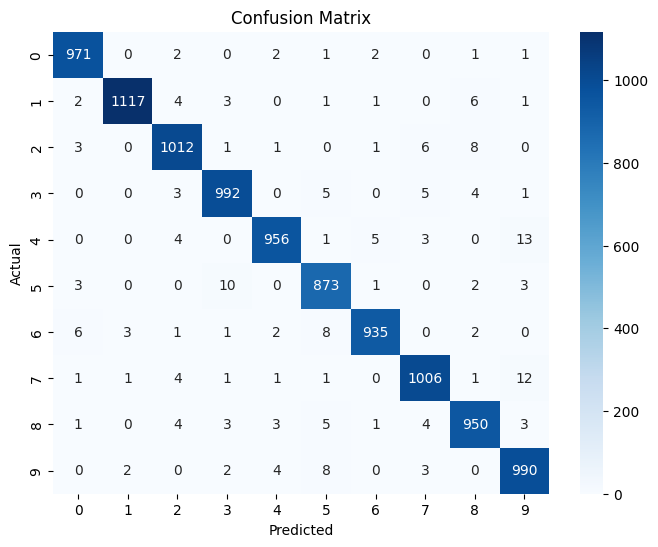

In [15]:
# 학습 루프 종료
print("모델 학습 완료. 테스트 데이터로 성능 평가를 진행합니다.")
evaluate_model(model, test_loader)


In [ ]:
## 여기서부터 CNN

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 전처리 (DNN과 동일)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [17]:
# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # [B, 32, 14, 14]
        x = self.pool(torch.relu(self.conv2(x)))  # [B, 64, 7, 7]
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# 3. 학습 루프
for epoch in range(10):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {running_loss / len(train_loader):.4f}")

Epoch 1 - Loss: 0.1365
Epoch 2 - Loss: 0.0420
Epoch 3 - Loss: 0.0298
Epoch 4 - Loss: 0.0217
Epoch 5 - Loss: 0.0166
Epoch 6 - Loss: 0.0130
Epoch 7 - Loss: 0.0112
Epoch 8 - Loss: 0.0086
Epoch 9 - Loss: 0.0093
Epoch 10 - Loss: 0.0057


In [19]:
# 4. 평가 함수 (DNN에서 쓰던 것 그대로)
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    print("\n=== 최종 평가 결과 ===")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

CNN 성능 평가

=== 최종 평가 결과 ===
Accuracy: 99.05%
F1 Score: 0.9905
Confusion Matrix:
[[ 973    0    0    0    0    0    3    0    3    1]
 [   0 1131    1    0    0    1    0    1    1    0]
 [   0    1 1028    0    0    0    0    1    2    0]
 [   0    0    2  997    0    7    0    0    4    0]
 [   0    1    1    0  972    0    0    0    4    4]
 [   1    0    0    4    0  881    2    0    4    0]
 [   0    2    0    0    1    4  946    0    5    0]
 [   0    5    8    0    0    0    0 1008    2    5]
 [   0    0    2    0    0    0    0    0  971    1]
 [   0    0    1    1    2    1    0    0    6  998]]


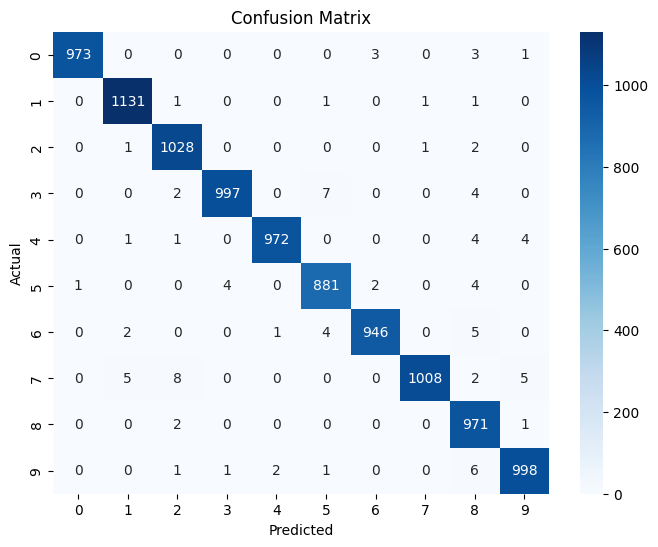

In [20]:
# 5. CNN 모델 성능 평가
print("CNN 성능 평가")
evaluate_model(model, test_loader)